In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# loading the fish market data
fish_data = pd.read_csv('Fish.csv')
fish_data.head()

In [24]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [25]:
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [26]:
fish_data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

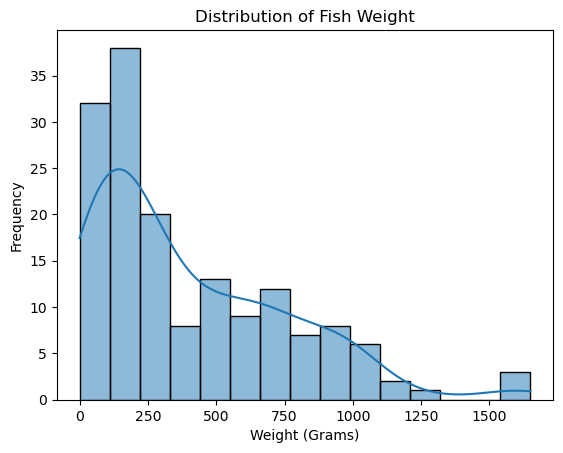

In [28]:
# Histogram of Weight
sns.histplot(fish_data['Weight'], bins=15, kde=True)
plt.xlabel('Weight (Grams)')
plt.ylabel('Frequency')
plt.title('Distribution of Fish Weight')
plt.show()

For the distribution of the target variable, there is a strong right skew. If the goal is to implement a linear regression model, it is likely that a transformation would be needed in order to improve the fit of the model. Linear regression assumes that the dependent variable is normally distributed, but based on this histogram, that assumption is currently violated. Prior to doing any transformation, I will examine the relationship between the predictors and the target.

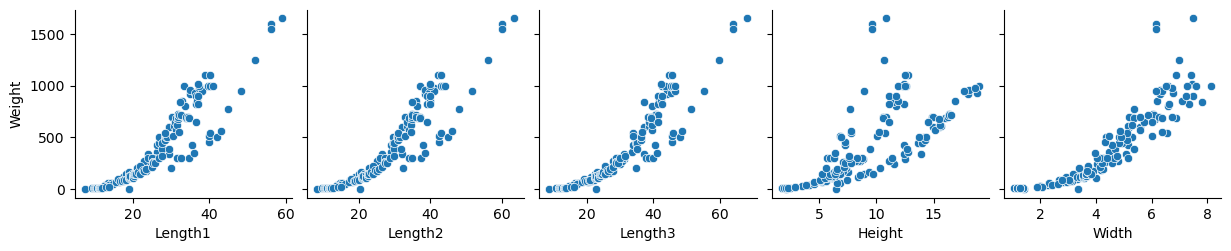

In [31]:
# Visualizing the relationship between the numerical predictors and target
predictor_vars = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

# Pairplot
sns.pairplot(fish_data, x_vars=predictor_vars, y_vars='Weight', kind='scatter')
plt.show()

For all of the predictor variables and the relationship with the target, there appears to be a curved relationship which could suggest that the relationship between Weight and the predictor variables is non-linear. A transformation or different type of regression may be needed to improve the fit of the model (But since this implementation is focusing on only linear regression, I will refrain from doing so). I will apply a log transformation to the dependent variable.

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


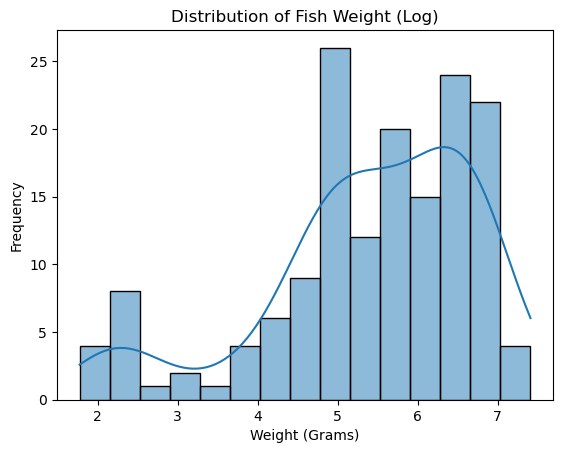

In [33]:
import numpy as np
fish_data['log_weight'] = np.log(fish_data['Weight'])

sns.histplot(fish_data['log_weight'], bins=15, kde=True)
plt.xlabel('Weight (Grams)')
plt.ylabel('Frequency')
plt.title('Distribution of Fish Weight (Log)')
plt.show()

After applying the log transformation, there is now a left-skew. This skew is more mild than the previous one and is more closer to normality. In practice, this would mean that a different transformation or the selection of a different model would be necessary. For this review, I will move forward with implementing linear regression.

## Assumptions of Linear Regression

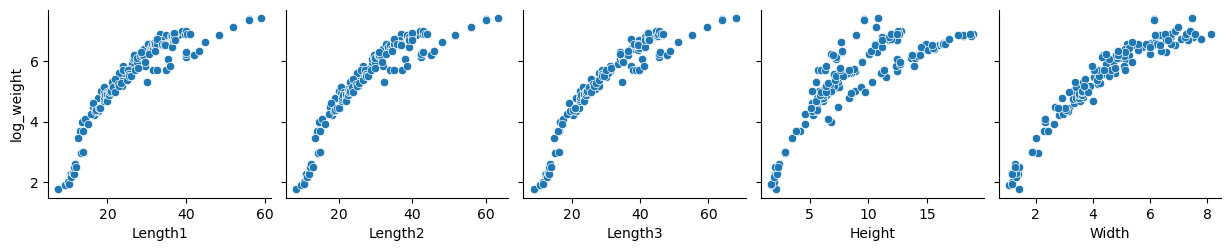

In [34]:
# Visualizing the relationship between the numerical predictors and target
predictor_vars = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

# Pairplot
sns.pairplot(fish_data, x_vars=predictor_vars, y_vars='log_weight', kind='scatter')
plt.show()

The first assumption for linear regression would be to check for linearity within the dependence variable. Based on the scatterplot, there is a slight curve present that could suggest a non-linear relationship. This strength of this curve is weaker when compared to the target variable that had not been transformed. 